In [1]:
# Marketplace Analytics Report

## Task 2: Analysis of Sellers and Products

In this notebook, we will analyze sellers and products on our marketplace. The goal is to provide insights into seller turnover, product performance, and their implications for our business.


### 1. Import Necessary Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Load datasets
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
sellers = pd.read_csv('sellers.csv', delimiter=',')
order_items = pd.read_csv('order_items.csv')
customers = pd.read_csv('customers.csv')


Data Preprocessing

In [39]:
# Convert necessary fields to datetime and handle missing values
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
products['product_weight_g'].fillna(products['product_weight_g'].mean(), inplace=True)

# Merge datasets for comprehensive view
merged_data = pd.merge(order_items, products, on='product_id')
merged_data = pd.merge(merged_data, sellers, on='seller_id')
merged_data = pd.merge(merged_data, orders, on='order_id')
merged_data = pd.merge(merged_data, customers, on='customer_id')

# Calculate total price including freight for each transaction
merged_data['total_price'] = merged_data['price'] + merged_data['freight_value']


###  Analysis

Seller Turnover Analysis

In [40]:
# Calculate seller turnover
seller_turnover = merged_data.groupby('seller_id')['total_price'].sum().sort_values()
top_sellers = seller_turnover.nlargest(5)
bottom_sellers = seller_turnover.nsmallest(5)


Seller turnover is calculated by summing up total_price for each seller.

Top and bottom sellers are identified based on turnover.

## Product Category Performance

In [41]:
# Calculate category turnover
category_turnover = merged_data.groupby('product_category_name')['total_price'].sum().sort_values(ascending=False)


Relationship between Product Weight and Sales

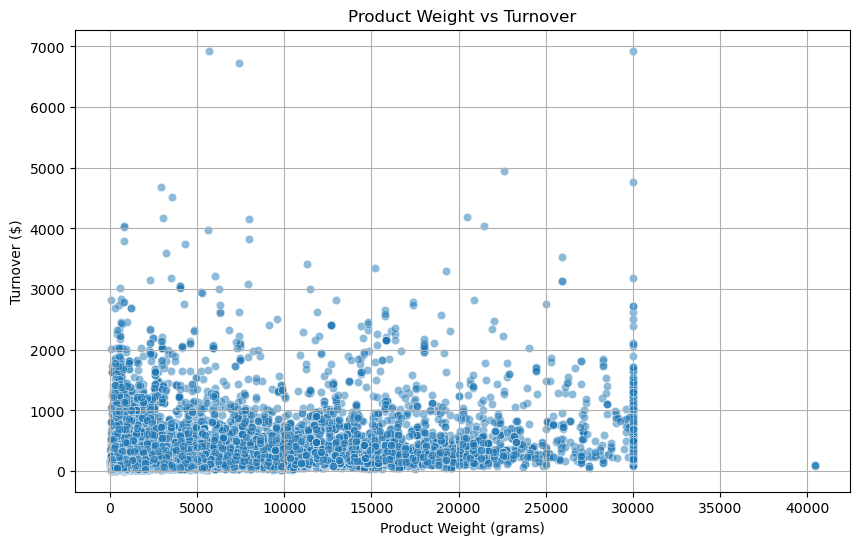

In [42]:
# Visualize relationship between product weight and sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='product_weight_g', y='total_price', data=merged_data, alpha=0.5)
plt.title('Product Weight vs Turnover')
plt.xlabel('Product Weight (grams)')
plt.ylabel('Turnover ($)')
plt.grid(True)
plt.show()


Scatter Plot: Examines the relationship between the weight of products and the turnover they generate.

### 5. Visualization

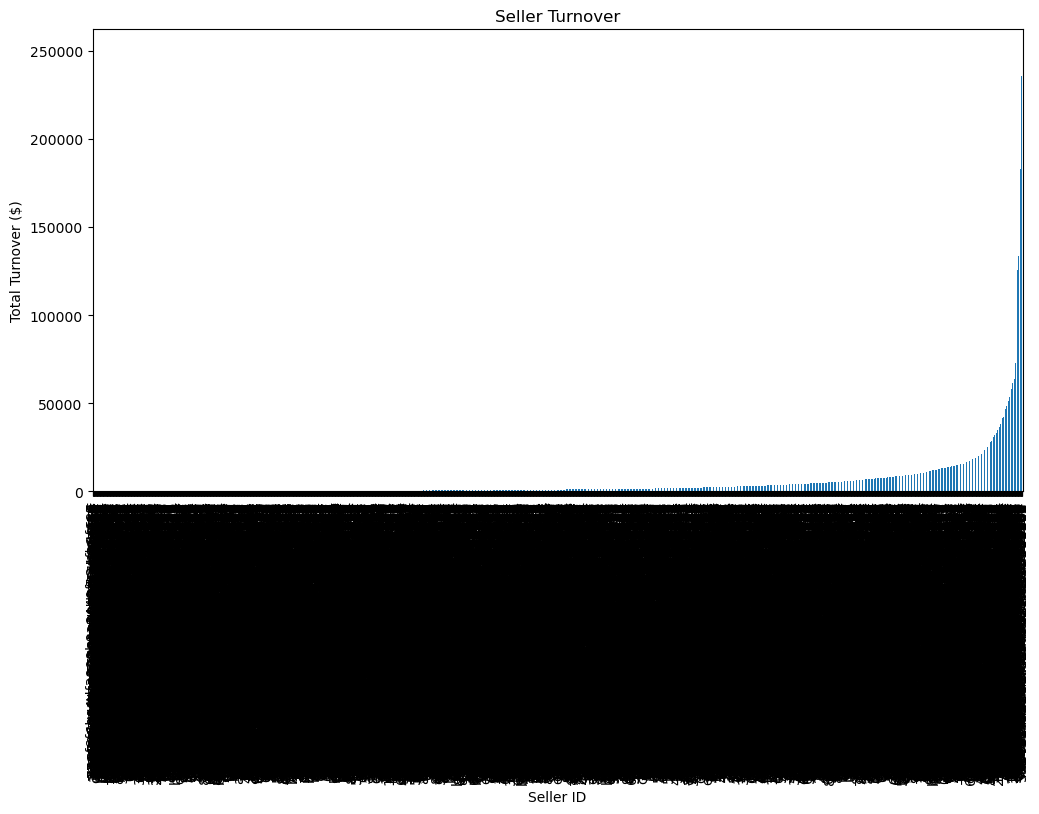

In [47]:
# Visualize seller turnover segmentation
plt.figure(figsize=(12, 6))
seller_turnover.plot(kind='bar')
plt.title('Seller Turnover')
plt.xlabel('Seller ID')
plt.ylabel('Total Turnover ($)')
plt.show()

Bar Chart: Shows the turnover for each seller. This visualization helps identify which sellers are contributing the most and the least to the marketplace.

Text(0, 0.5, 'Turnover ($)')

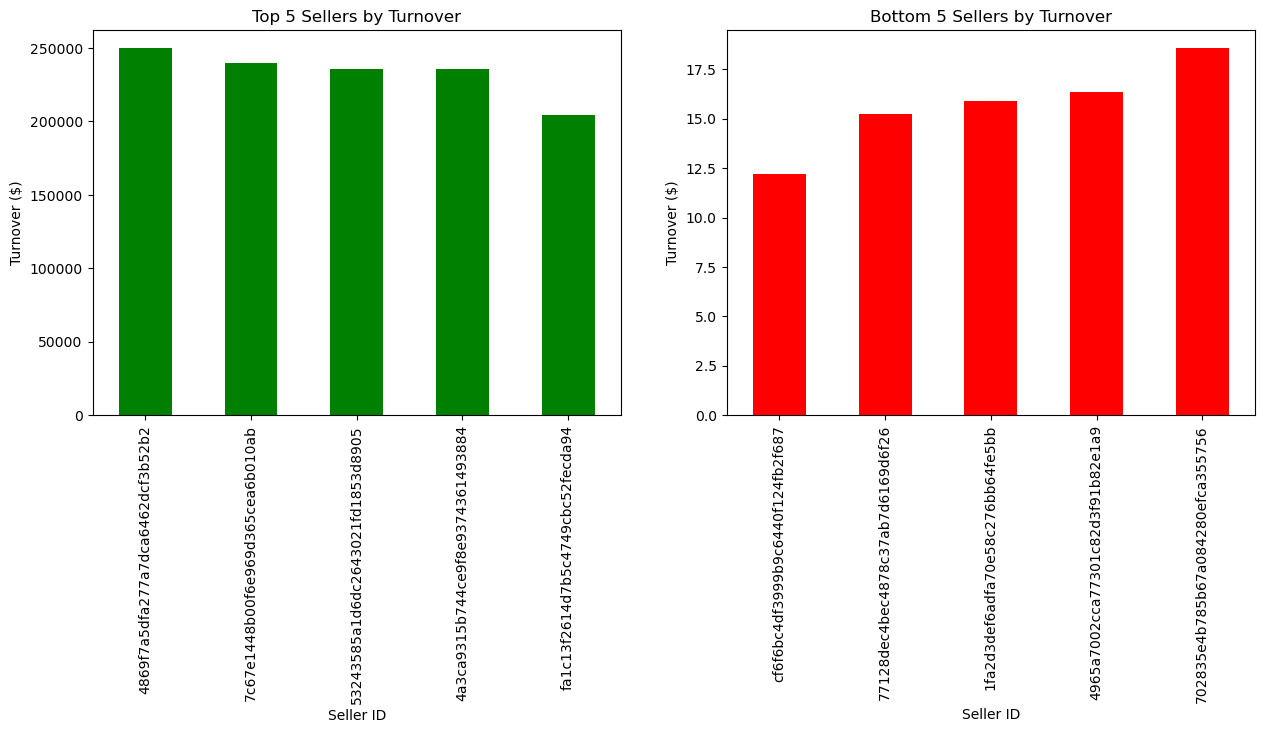

In [44]:
# Top and bottom sellers visualization
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
top_sellers.plot(kind='bar', ax=axs[0], color='green')
axs[0].set_title('Top 5 Sellers by Turnover')
axs[0].set_xlabel('Seller ID')
axs[0].set_ylabel('Turnover ($)')
bottom_sellers.plot(kind='bar', ax=axs[1], color='red')
axs[1].set_title('Bottom 5 Sellers by Turnover')
axs[1].set_xlabel('Seller ID')
axs[1].set_ylabel('Turnover ($)')

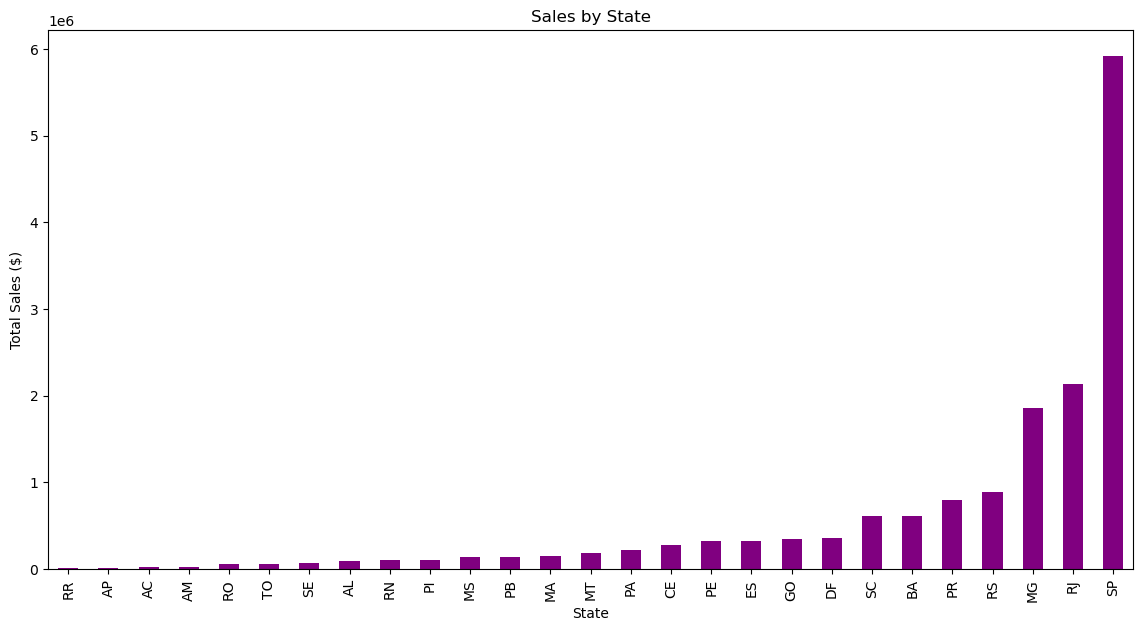

In [45]:
# Geographic sales performance
state_sales = merged_data.groupby('customer_state')['total_price'].sum().sort_values()
plt.figure(figsize=(14, 7))
state_sales.plot(kind='bar', color='purple')
plt.title('Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales ($)')
plt.show()

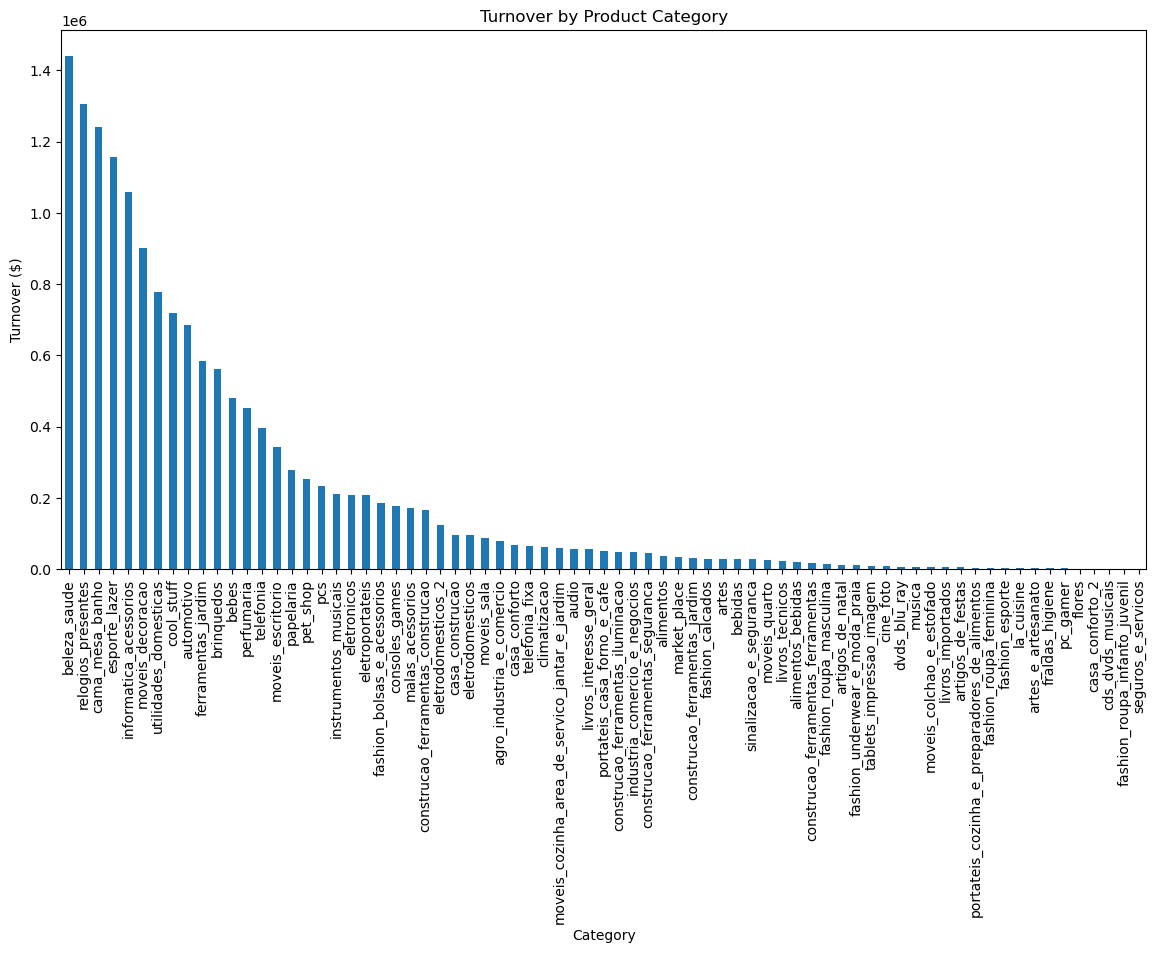

In [48]:
plt.figure(figsize=(14, 7))
category_turnover.plot(kind='bar')
plt.title('Turnover by Product Category')
plt.xlabel('Category')
plt.ylabel('Turnover ($)')
plt.show()


Bar Chart: Displays turnover by category, useful for identifying which categories are the most lucrative.

## 6. Conclusion

Seller Analysis: Understanding which sellers are performing well (or poorly) can help in targeting business support and marketing efforts. Top performers might be given incentives, while underperformers could be offered assistance or training to improve sales.

Product Category Insights: Knowledge of which categories perform best can guide inventory management and promotional strategies. This information helps in prioritizing stock and marketing resources towards the most profitable categories.

Product Weight Insights: Analyzing the relationship between product weight and sales can inform shipping strategies and pricing models. Heavier items might be less profitable due to higher shipping costs, suggesting a need for pricing adjustments or promotional strategies to boost their sales.

By addressing these areas, the marketplace can optimize its offerings and strategies to better support sellers, manage inventory, and ultimately increase profitability.